In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_C_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.0,27.0,31.0,0.0
1,85.0,64.0,59.0,32.0,23.0,0.0
2,86.0,54.0,33.0,16.0,54.0,0.0
3,91.0,78.0,34.0,24.0,36.0,0.0
4,98.0,55.0,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25.0,22.0,35.0,4.0
341,89.0,48.0,32.0,22.0,14.0,4.0
342,85.0,52.0,22.0,23.0,34.0,4.0
343,95.0,93.0,21.0,27.0,47.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4
float64		column 2	1
float64		column 3	4
float64		column 4	2
float64		column 5	4
float64		column 6	5


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,341.000000,344.000000,341.000000,343.000000,341.000000,340.000000
mean,90.164223,69.869186,30.175953,24.650146,38.143695,3.448529
std,4.449985,18.374395,19.339950,10.093426,39.329078,3.352606
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,24.000000,3.000000
75%,93.000000,80.000000,34.000000,27.000000,44.000000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

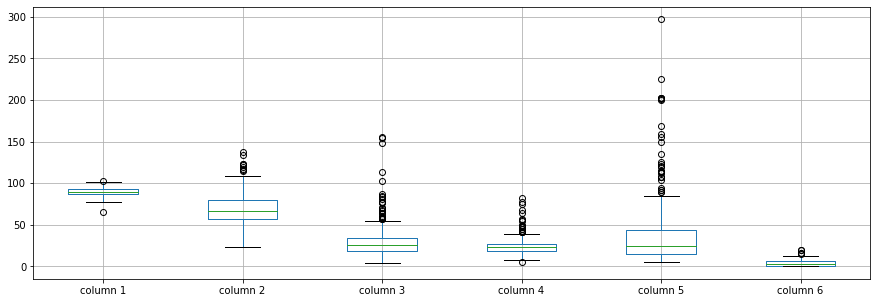

In [5]:
df.boxplot(return_type='axes', figsize=(15,5
                                       ))

In [6]:
df.mean()

column 1    90.164223
column 2    69.869186
column 3    30.175953
column 4    24.650146
column 5    38.143695
column 6     3.448529
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.054225,0.135762,0.179159,0.220596,0.308346
column 2,0.054225,1.000000,0.070702,0.148783,0.133494,0.096514
column 3,0.135762,0.070702,1.000000,0.737318,0.504943,0.190127
column 4,0.179159,0.148783,0.737318,1.000000,0.526302,0.280960
column 5,0.220596,0.133494,0.504943,0.526302,1.000000,0.346949
column 6,0.308346,0.096514,0.190127,0.280960,0.346949,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+89,6+89+89,6+89+89+89,6+89+89+89+89,6+89+89+89,6+89+89,6+89,6], vae_layer = False, seed = 890)
imputer.build_model(df)
imputer.train_model(training_epochs=112)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 277.0107203892299
Epoch: 1 , loss: 277.834219796317
Epoch: 2 , loss: 279.0606202625093
Epoch: 3 , loss: 278.9927331833612
Epoch: 4 , loss: 277.2876630510603
Epoch: 5 , loss: 279.13455563499815
Epoch: 6 , loss: 276.38916742234005
Epoch: 7 , loss: 279.54272606259303
Epoch: 8 , loss: 278.4927251906622
Epoch: 9 , loss: 277.27227710542223
Epoch: 10 , loss: 278.45172046479723
Epoch: 11 , loss: 278.0780407133557
Epoch: 12 , loss: 275.888666062128
Epoch: 13 , loss: 277.09646679106214
Epoch: 14 , loss: 271.7399386451358
Epoch: 15 , loss: 263.71415129162017
Epoch: 16 , loss: 243.00007120768228
Epoch: 17 , loss: 221.99548848470053
Epoch: 18 , loss: 209.17162431989397
Epoch: 19 , loss: 209.43042646135603
Epoch: 20 , loss: 202.33087448846726
Epoch: 21 , loss: 204.2861829485212
Epoch: 22 , loss: 199.33414713541666
Epoch: 23 , loss: 197.34117998395647
Epoch: 24 , loss: 204.97769964308966
Epoch: 25 , loss: 198.83703467

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.000000
column 2    47.000000
column 3    28.000000
column 4    15.000000
column 5    18.000000
column 6     1.664373
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
340,0.0,0.0,0.0,0.0,0.0,0.0
341,0.0,0.0,0.0,0.0,0.0,0.0
342,0.0,0.0,0.0,0.0,0.0,0.0
343,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

176.17288967279143

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [18]:
NRMS=numerator/denominator
NRMS


0.06991647752619617

In [19]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.0,27.0,31.0,0.0
1,85.0,64.0,59.0,32.0,23.0,0.0
2,86.0,54.0,33.0,16.0,54.0,0.0
3,91.0,78.0,34.0,24.0,36.0,0.0
4,98.0,55.0,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25.0,22.0,35.0,4.0
341,89.0,48.0,32.0,22.0,14.0,4.0
342,85.0,52.0,22.0,23.0,34.0,4.0
343,95.0,93.0,21.0,27.0,47.0,6.0


In [21]:
imputations[-1].to_excel("Bupa_C_1(imp).xlsx", index=False, header=False)